# Partie 1 - Exploration des données

## Chargement des librairies et lecture du dataset

In [88]:
library(ggmap)
library(ggplot2)
library(data.table)
library(dplyr)
library(tidyr)

API_key <- readLines("API.txt",n = 1)
options(repr.plot.width = 12, repr.plot.height = 6)


register_stadiamaps(key = API_key)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in readLines("API.txt", n = 1):
“incomplete final line found on 'API.txt'”


In [2]:
# Lire les données depuis le csv 
df <- read.csv("donnees-synop-essentielles-omm.csv", sep = ";", header = TRUE)

## Description quantitative des données

In [ ]:
cat("Le dataset contient", nrow(df), "lignes (points de mesures) et", ncol(df), "colonnes (paramètres).\n")
cat("Il contient des données météo issues de", length(unique(df$ID.OMM.station)), "stations.\n")

cat("Les données débutent le", min(df$Date), "et se terminent le", max(df$Date), ".\n")

Le dataset contient 1719567 lignes (points de mesures) et 82 colonnes (paramètres).


Il contient des données météo issues de 62 stations.
Les données débutent le 2015-08-04T02:00:00+02:00 et se terminent le 2025-09-03T23:00:00+02:00 .
Les données débutent le 2015-08-04T02:00:00+02:00 et se terminent le 2025-09-03T23:00:00+02:00 .


## Répartition temporelle des données
On regarde l'étendue de nos données et les éventuels trous pour ne pas suranalyser des phénomènes plus tard (ex si on a un hiver de + dans les données, cela fausse nos moyennes de température)

In [ ]:
annee <- as.numeric(format(as.Date(df$Date), "%Y"))
mois <- as.numeric(format(as.Date(df$Date), "%m"))

df$Annee <- annee
df$Mois <- mois

Cette représentation montre que les données sont globalement bien réparties sur les mois.


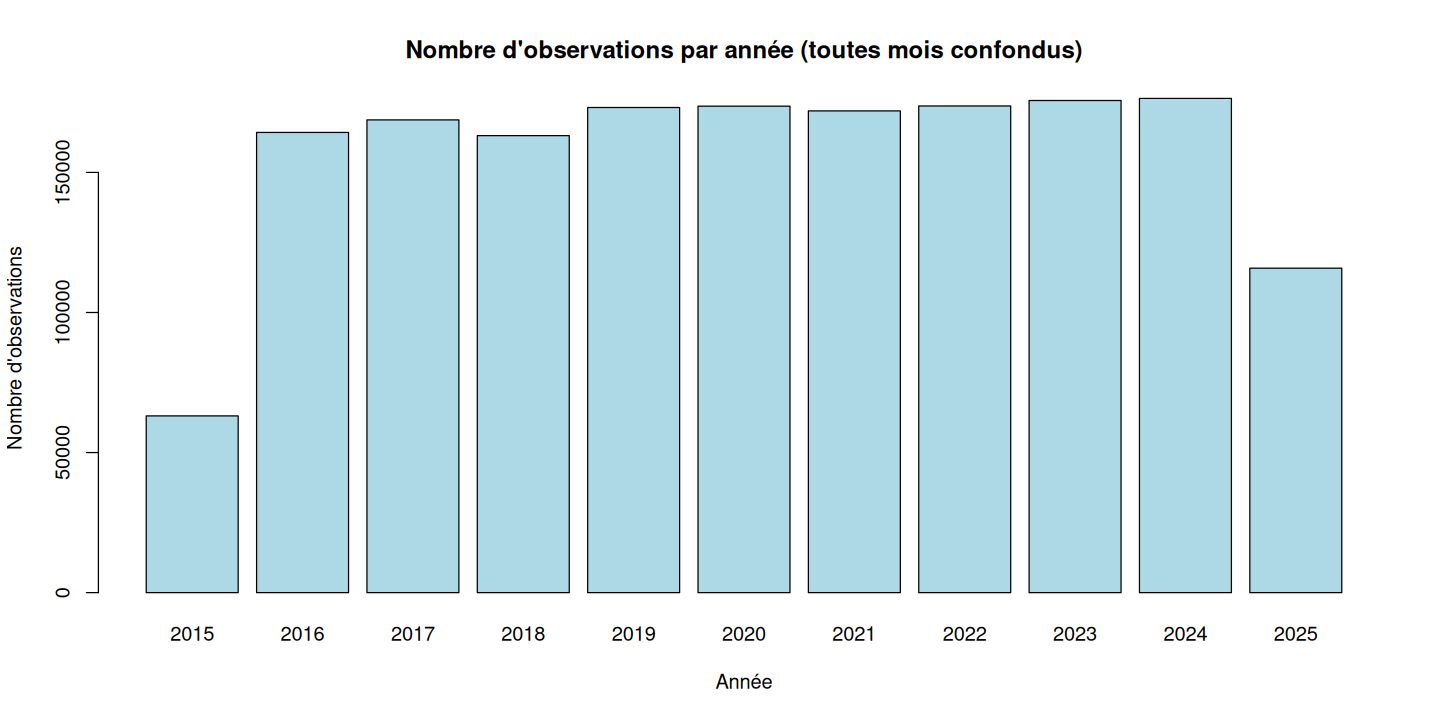

In [ ]:
par(bg = "white")
barplot(table(annee),
        main = "Nombre d'observations par année (toutes mois confondus)",
        col = "lightblue",
        xlab = "Année",
        ylab = "Nombre d'observations")

cat("Cette représentation montre que les données sont globalement bien réparties sur les mois.\n")


En 2025 il est normal qu'il manque quelques mois  
En 2016 en revanche le nombre de données est plus faible. On doit vérifier si l'année est complète ou si quelques mois seulement sont représentés



En 2016, les mois représentés sont :  8 9 10 11 12 
En 2025, les mois représentés sont :  1 2 3 4 5 6 7 8 9 
En 2025, les mois représentés sont :  1 2 3 4 5 6 7 8 9 


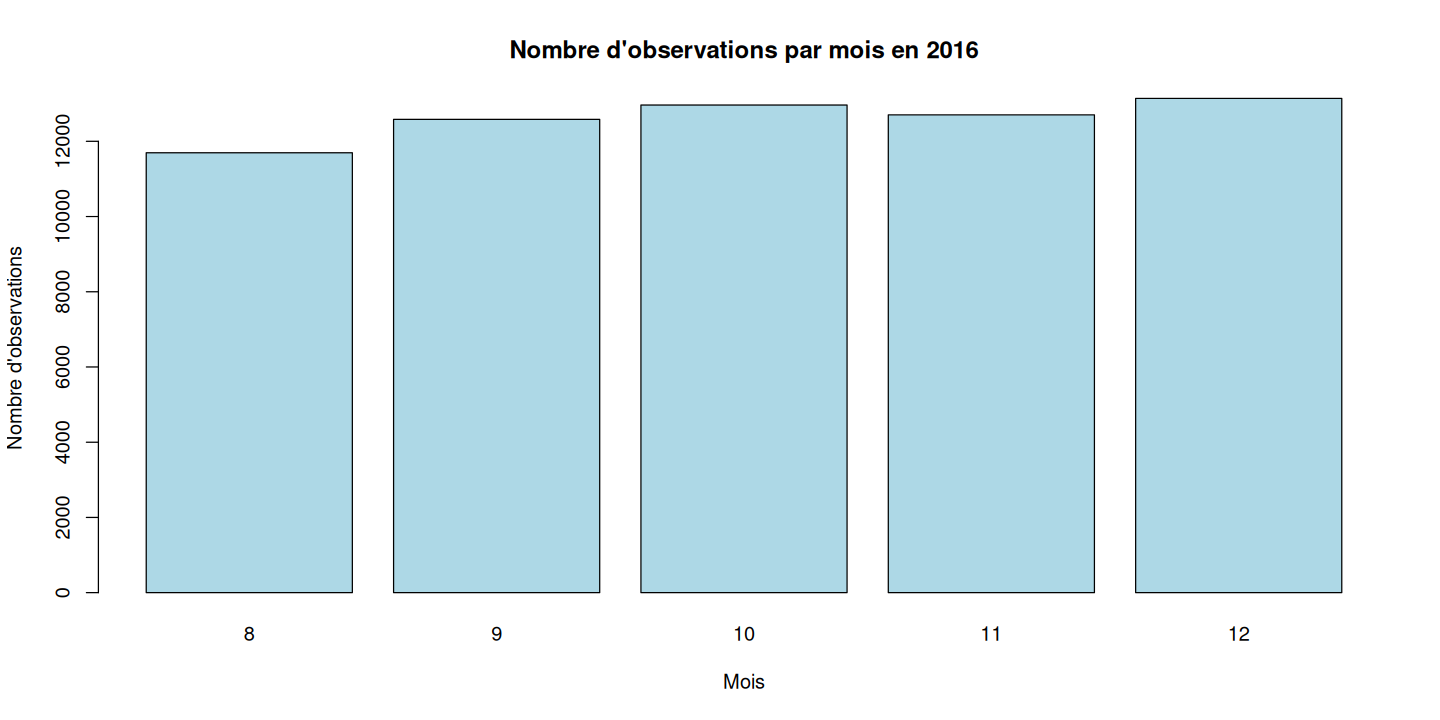

In [ ]:
cat("En 2016, les mois représentés sont : ", sort(unique(mois[annee == 2015])), "\n")
cat("En 2025, les mois représentés sont : ", sort(unique(mois[annee == 2025])), "\n")

par(bg = "white")
barplot(table(mois[annee == 2015]),
        main = "Nombre d'observations par mois en 2016",
        col = "lightblue",
        xlab = "Mois",
        ylab = "Nombre d'observations")

On regarde désormais un point de vue global

Cette représentation montre que les données sont globalement bien réparties sur les mois.


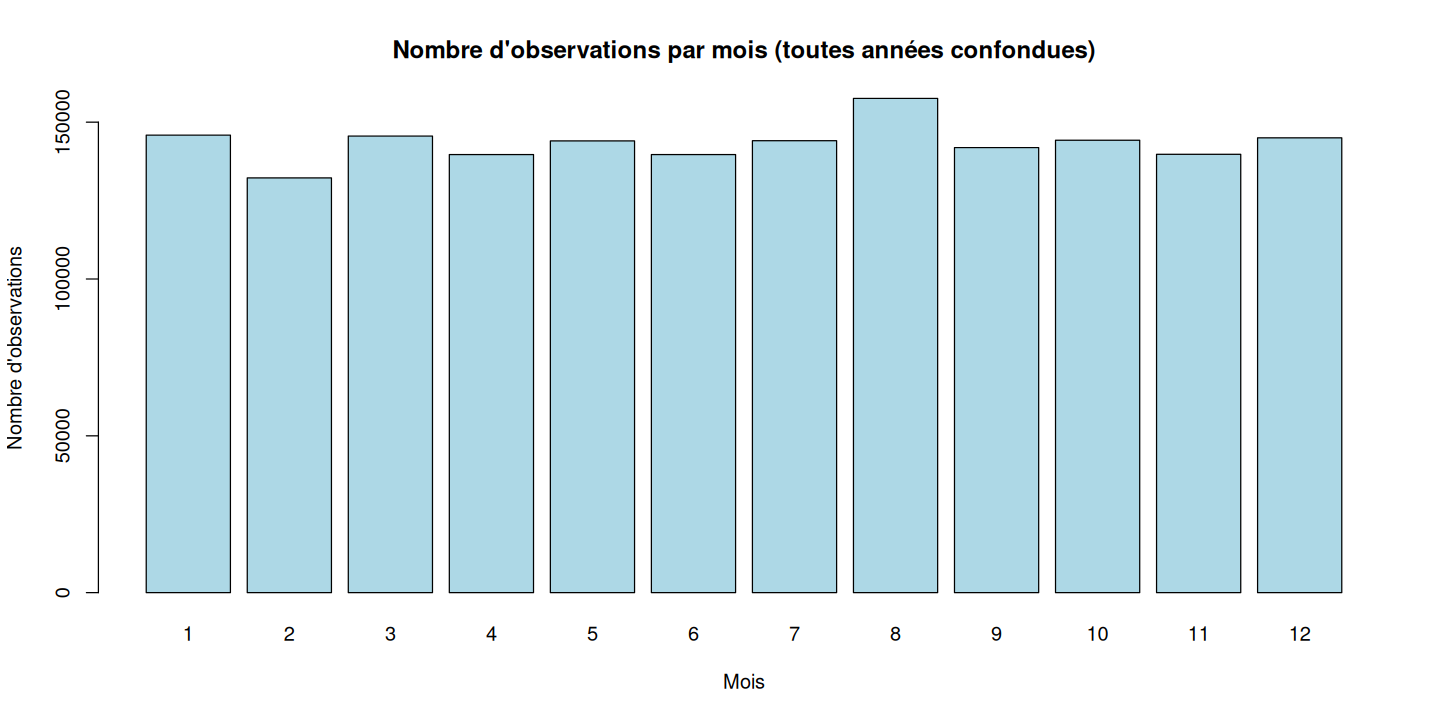

In [ ]:
par(bg = "white")
barplot(table(mois),
        main = "Nombre d'observations par mois (toutes années confondues)",
        col = "lightblue",
        xlab = "Mois",
        ylab = "Nombre d'observations")

cat("Cette représentation montre que les données sont globalement bien réparties sur les mois.\n")

## Données géographiques

In [ ]:
cat("Le dataset comporte",length(unique(df$communes..code.)), "communes différentes.\n")
cat("Le dataset comporte",length(unique(df$department..code.)), "départements différents.\n")
cat("Le dataset comporte",length(unique(df$region..code.)), "régions différentes.\n")

Le dataset comporte 59 communes différentes.
Le dataset comporte 53 départements différents.
Le dataset comporte 53 départements différents.
Le dataset comporte 22 régions différentes.
Le dataset comporte 22 régions différentes.


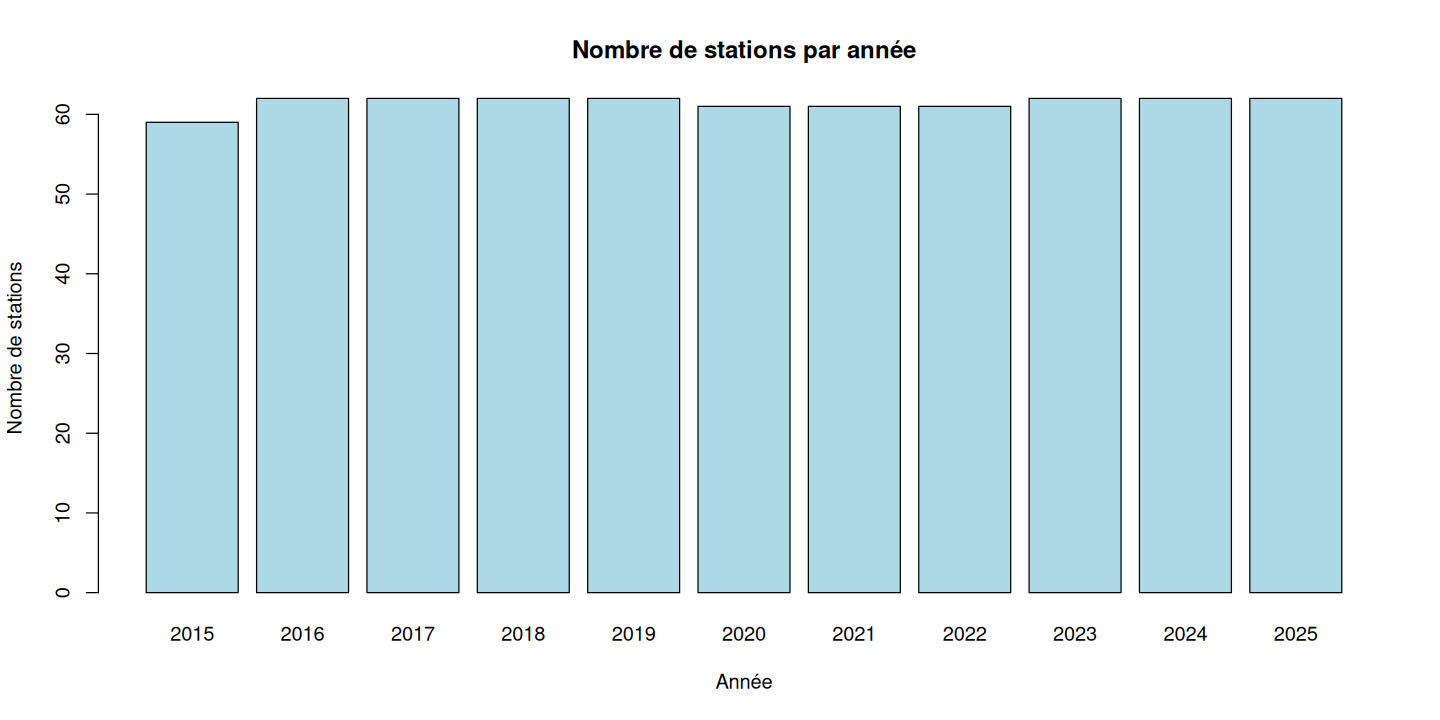

In [ ]:
# Nombre de stations uniques par année
nb_stations <- tapply(df$ID.OMM.station, df$Annee, function(x) length(unique(x)))

par(bg = "white")
barplot(nb_stations,
        main = "Nombre de stations par année",
        col = "lightblue",
        xlab = "Année",
        ylab = "Nombre de stations")

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.



Warning message:
“Removed 20 rows containing missing values or values outside the scale range
(`geom_point()`).”


Il y a 20 stations a priori hors de france métropolitaine

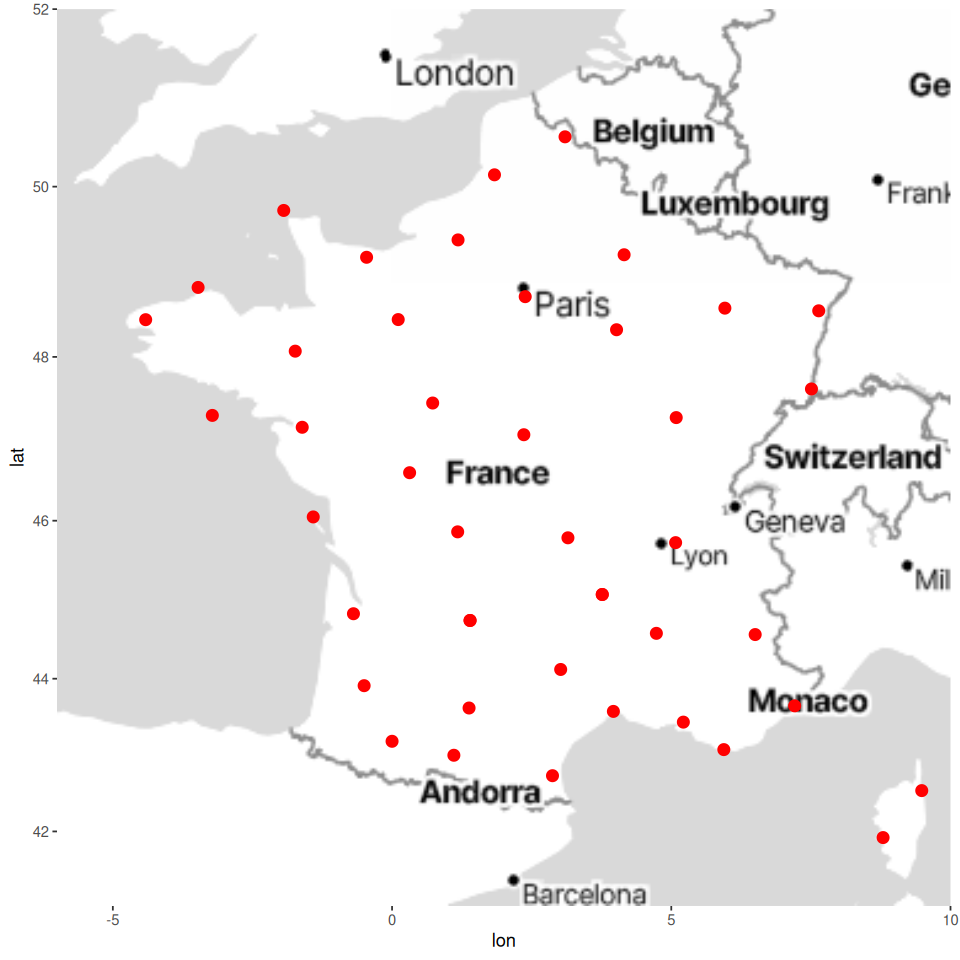

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)
fr_bbox <- c(left = -6, bottom = 41, right = 10, top = 52)
map <- get_stadiamap(bbox = fr_bbox, zoom = 5, maptype = "stamen_toner_lite")

stations <- unique(df[, c("Longitude", "Latitude")])

ggmap(map) +
geom_point(
    data = stations,
    aes(x = Longitude, y = Latitude),
    color = "red",
    size = 3
  )

cat("Il y a 20 stations a priori hors de france métropolitaine")
options(repr.plot.width = 12, repr.plot.height = 6)


## Qualité

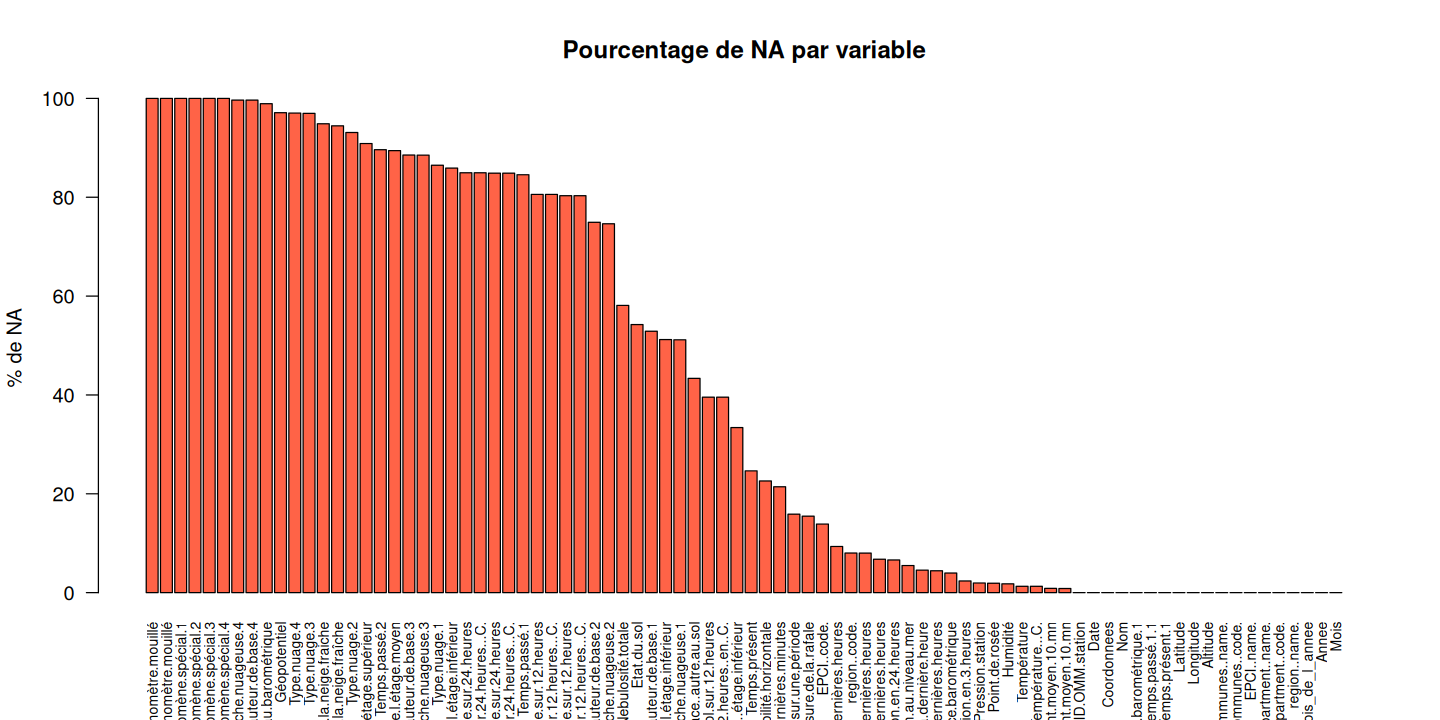

In [ ]:
par(bg = "white")
options(repr.plot.width = 12, repr.plot.height = 6)

na_pct <- colMeans(is.na(as.data.frame(df))) * 100
na_pct <- sort(na_pct, decreasing = TRUE)

barplot(na_pct,
        main = "Pourcentage de NA par variable",
        col = "tomato",
        las = 2,
        ylab = "% de NA",
        cex.names = 0.7)

## Première Analyse

## Moyenne des températures par année - MAIGNAN
On enlève 2015 et 2025 qui ne sont pas complètes

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduits lors de la conversion automatique”
Warning message in min(x):
“aucun argument trouvé pour min ; Inf est renvoyé”
Warning message in max(x):
“aucun argument pour max ; -Inf est renvoyé”
Warning message in min(x):
“aucun argument trouvé pour min ; Inf est renvoyé”
Warning message in max(x):
“aucun argument pour max ; -Inf est renvoyé”


ERROR: Error in plot.window(...): 'xlim' nécessite des valeurs finies


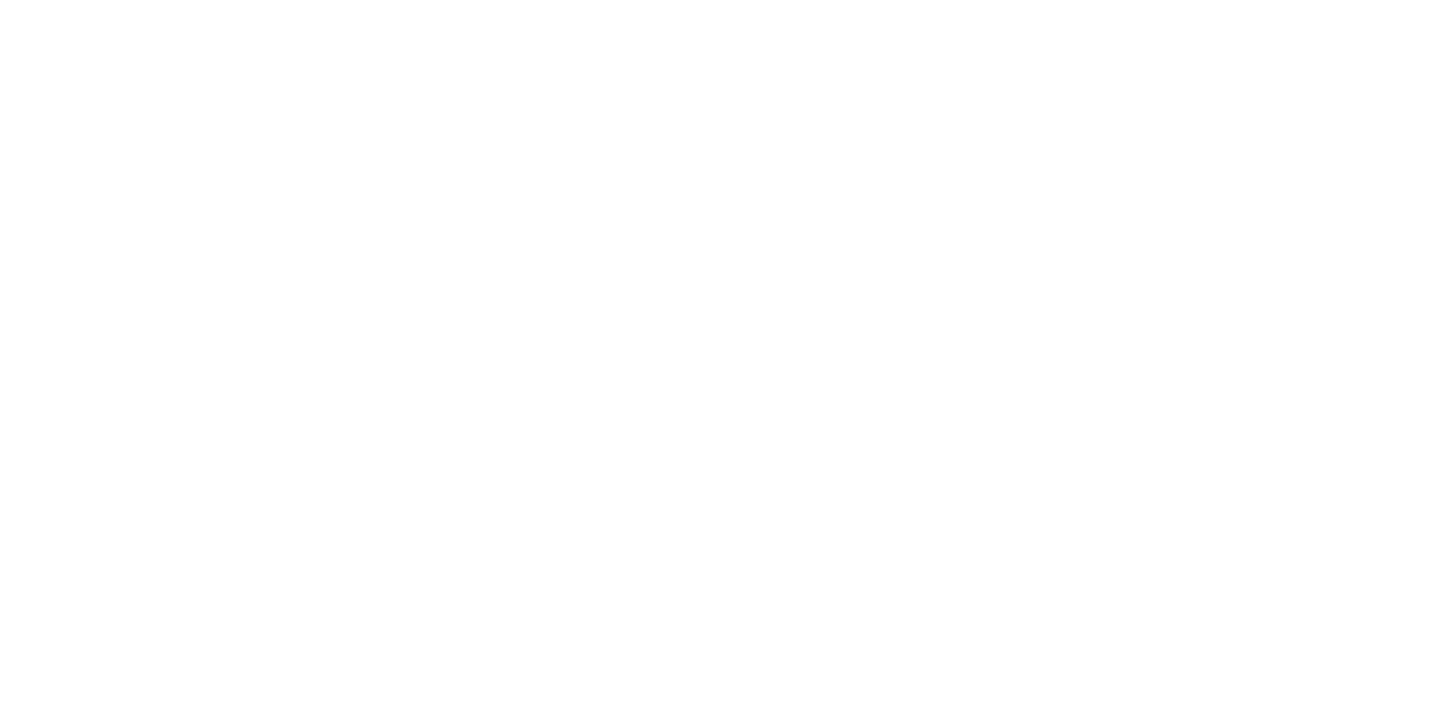

In [ ]:
df_subset <- df[, c("Date", "Température...C.")]
df_subset$Date <- format(as.POSIXct(df$Date, format="%Y-%m-%dT%H:%M:%S", tz="UTC"), "%Y")
df_clean <- na.exclude(df_subset)
df_clean <- df_clean[df_clean$Date != "", ]
df_clean <- df_clean[df_clean$Température...C. != "", ]


df_temp_annee <- aggregate(Température...C. ~ Date , data = df, FUN = mean, na.rm = TRUE)
par(bg = "white")
plot(df_temp_annee$Date, df_temp_annee$Température...C.)


## Comparaison entre stations

In [ ]:
dt <- as.data.table(df)

In [36]:
dt_2024 <- dt[Date >= "2024-01-01" & Date <= "2024-12-31"]

In [37]:
dt_caen_2024 <- dt_2024[communes..name. == "Carpiquet"]

dim(dt_caen_2024)


[1] 2914   82

In [38]:
dt_toulouse_2024 <- dt_2024[communes..name. == "Blagnac"]

dim(dt_toulouse_2024)


[1] 2918   82

In [39]:
dt_guyane_2024 <- dt_2024[communes..name. == "Saint-Laurent-du-Maroni"]

dim(dt_guyane_2024)

[1] 2786   82

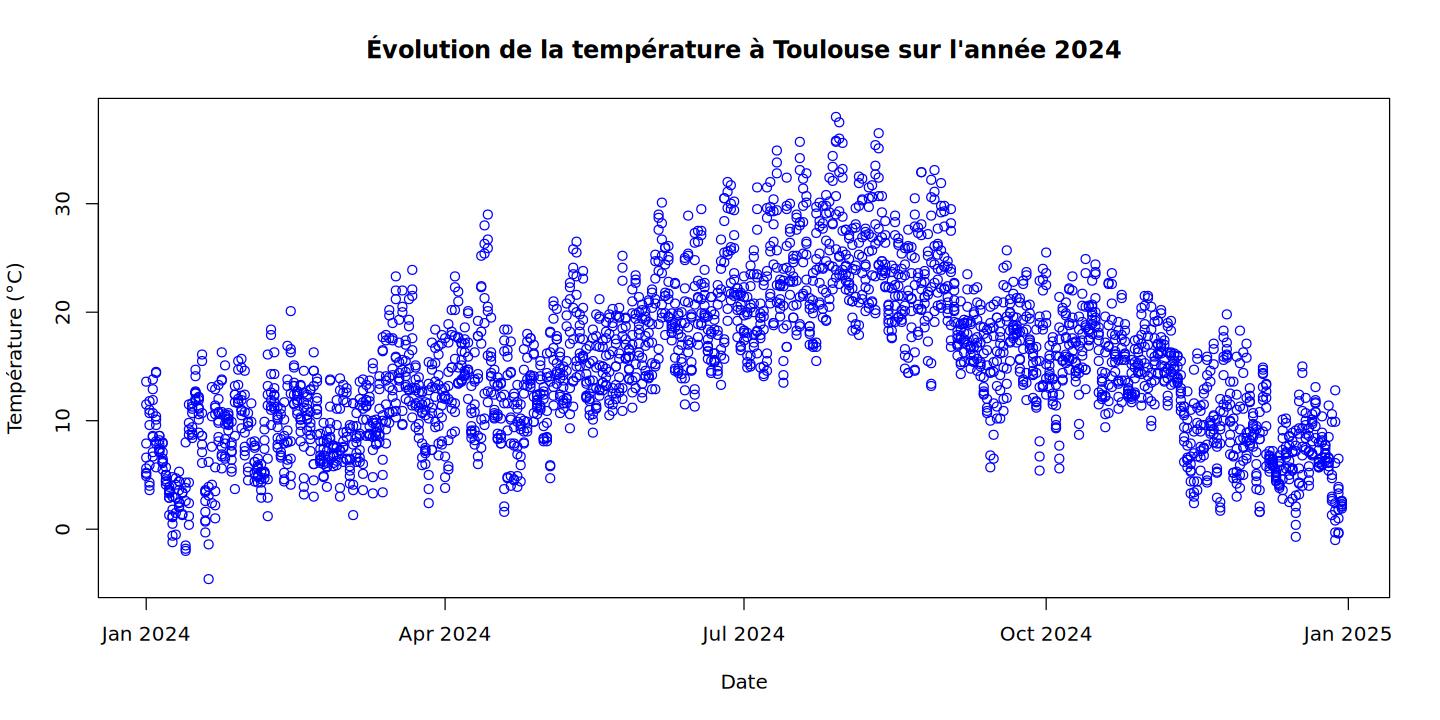

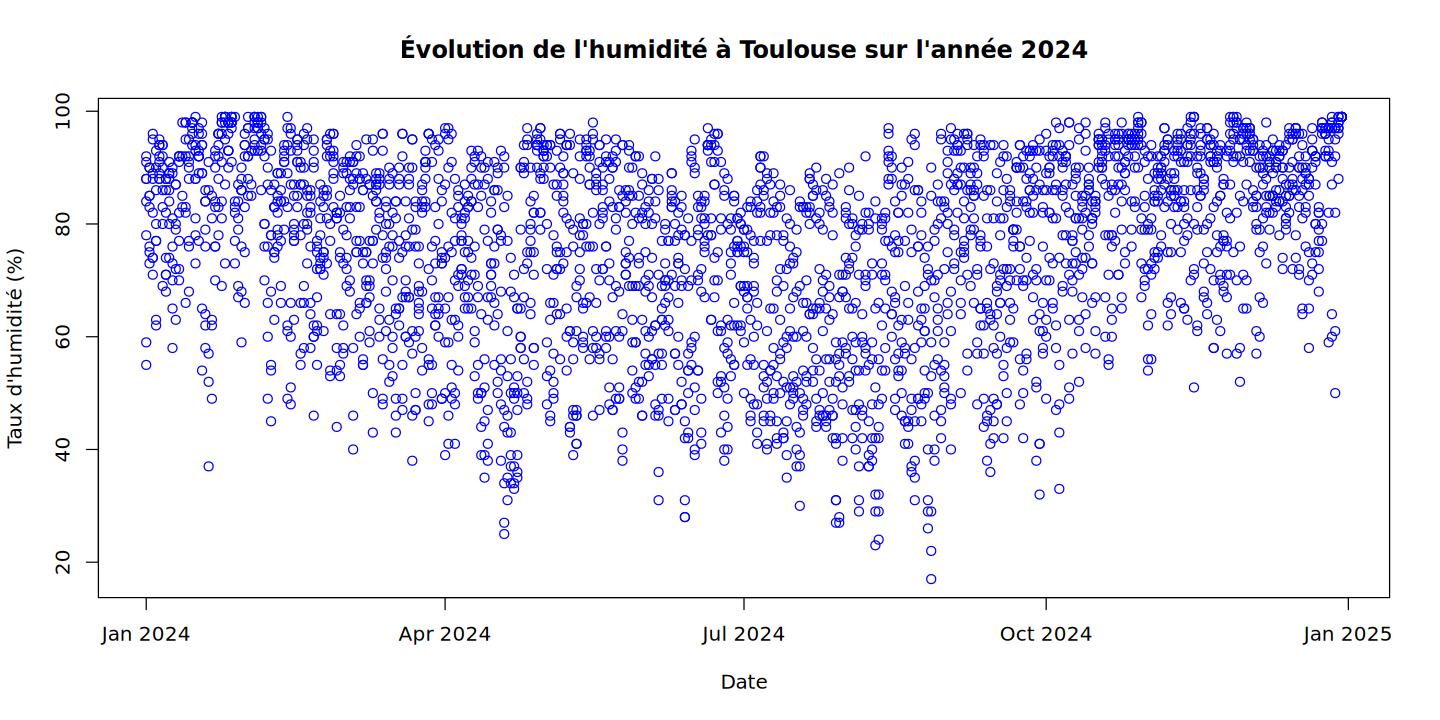

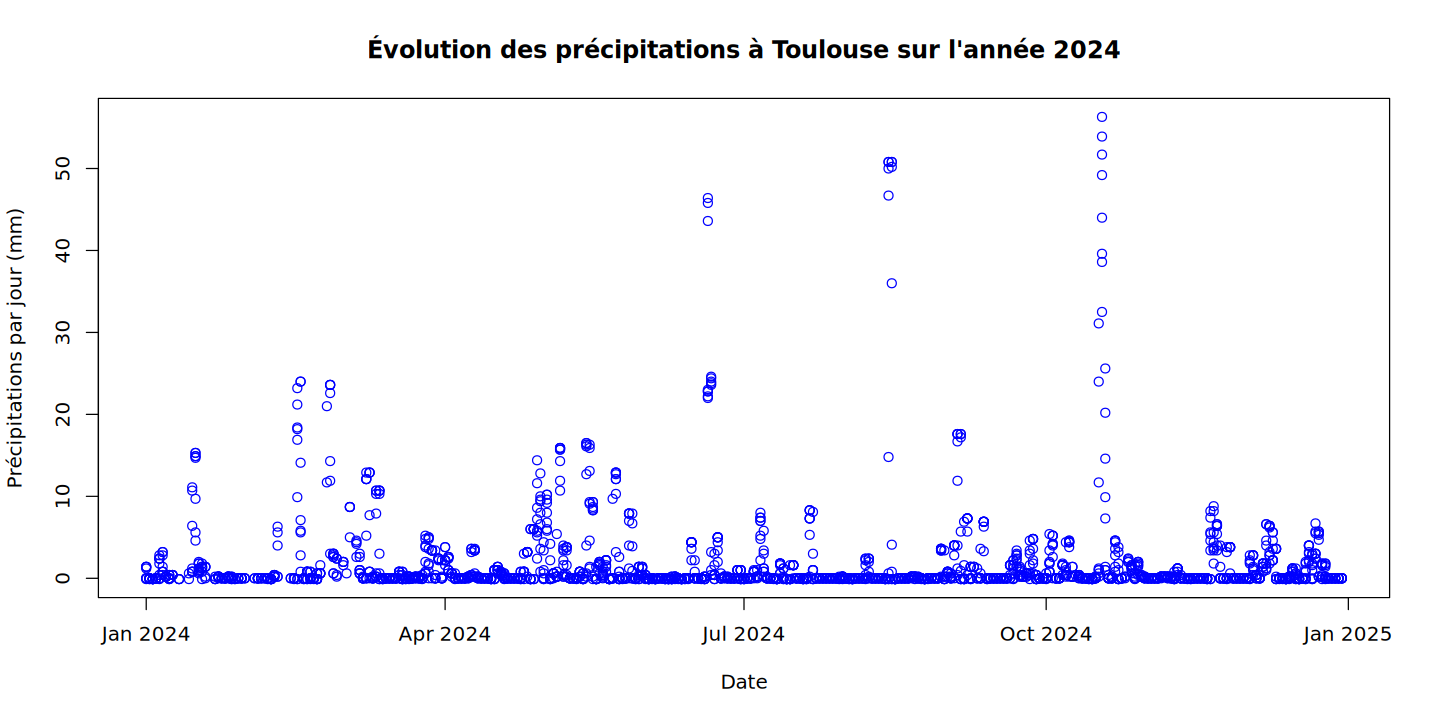

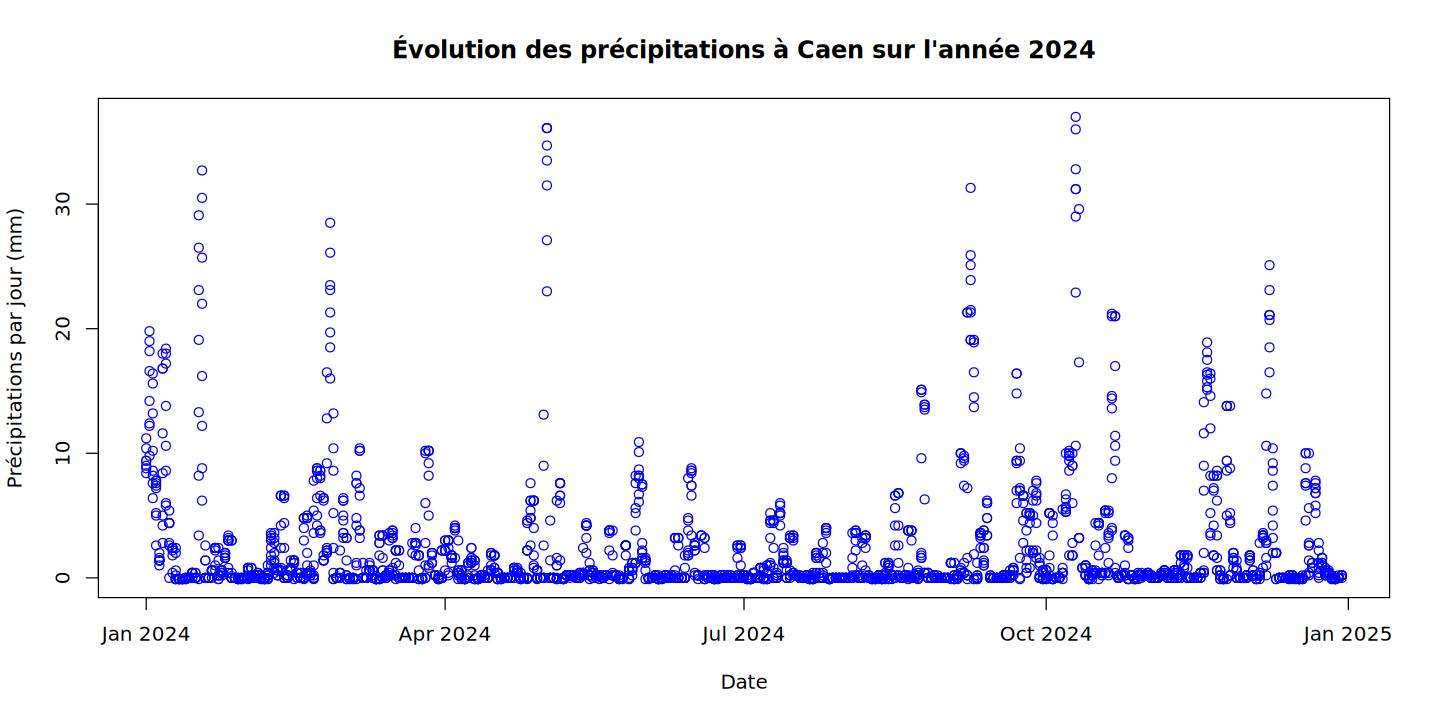

In [25]:
dt_caen_2024$Date = as.Date(dt_caen_2024$Date)
dt_toulouse_2024$Date = as.Date(dt_toulouse_2024$Date)


par(bg = "white")

plot(dt_toulouse_2024$Date[!is.na(dt_toulouse_2024$`Température...C.`)],
     dt_toulouse_2024$`Température...C.`[!is.na(dt_toulouse_2024$`Température...C.`)], 
     type = "p",
     col = "blue",
     xlab = "Date", 
     ylab = "Température (°C)", 
     main = "Évolution de la température à Toulouse sur l'année 2024")

plot(dt_toulouse_2024$Date[!is.na(dt_toulouse_2024$`Humidité`)],
     dt_toulouse_2024$`Humidité`[!is.na(dt_toulouse_2024$`Humidité`)], 
     type = "p",
     col = "blue",
     xlab = "Date", 
     ylab = "Taux d'humidité (%)", 
     main = "Évolution de l'humidité à Toulouse sur l'année 2024")

plot(dt_toulouse_2024$Date[!is.na(dt_toulouse_2024$`Précipitations.dans.les.24.dernières.heures`)],
     dt_toulouse_2024$`Précipitations.dans.les.24.dernières.heures`[!is.na(dt_toulouse_2024$`Précipitations.dans.les.24.dernières.heures`)], 
     type = "p",
     col = "blue",
     xlab = "Date", 
     ylab = "Précipitations par jour (mm)", 
     main = "Évolution des précipitations à Toulouse sur l'année 2024")

plot(dt_caen_2024$Date[!is.na(dt_caen_2024$`Précipitations.dans.les.24.dernières.heures`)],
     dt_caen_2024$`Précipitations.dans.les.24.dernières.heures`[!is.na(dt_caen_2024$`Précipitations.dans.les.24.dernières.heures`)], 
     type = "p",
     col = "blue",
     xlab = "Date", 
     ylab = "Précipitations par jour (mm)", 
     main = "Évolution des précipitations à Caen sur l'année 2024")

Il semblerait tout de même qu'il pleuve plus souvent à Caen qu'à Toulouse.

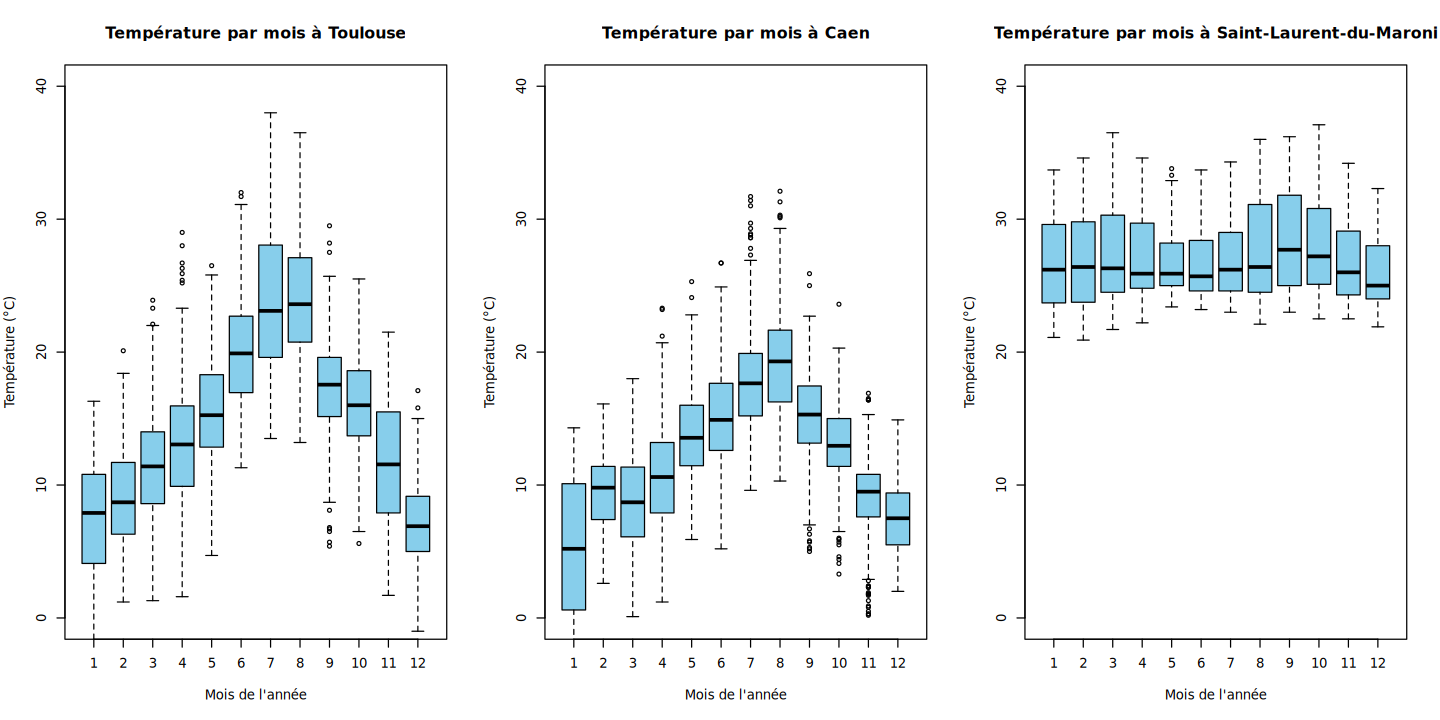

In [31]:
par(mfrow = c(1,3), bg = "white")
boxplot(Température...C. ~ mois_de_l_annee, data = dt_toulouse_2024,col = "skyblue",
        main = "Température par mois à Toulouse",
        xlab = "Mois de l'année",
        ylab = "Température (°C)",
        ylim = c(0,40))

boxplot(Température...C. ~ mois_de_l_annee, data = dt_caen_2024,col = "skyblue",
        main = "Température par mois à Caen",
        xlab = "Mois de l'année",
        ylab = "Température (°C)",
        ylim = c(0,40))

boxplot(Température...C. ~ mois_de_l_annee, data = dt_guyane_2024,col = "skyblue",
        main = "Température par mois à Saint-Laurent-du-Maroni",
        xlab = "Mois de l'année",
        ylab = "Température (°C)",
        ylim = c(0,40))

On notera ici que la répartition des températures au sein d'un mois semble suivre la même tendance à Toulouse et à Caen, mais avec des valeurs moyennes différentes. On pourra s'en servir plus tard lorsque l'on effectuera nos tests d'hypothèses, afin de démontrer que les lois suivies par ces distributions ne possèdent pas les mêmes paramètres.  
On notera en revanche qu'au sein d'un mois, l'étalement des données semble toujours à peu près le même (à part pour janvier à Caen).  
Pour ce qui est du cas de la Guyane, on note une nette différence dans cette distribution par rapport aux autres, avec une température mensuelle moyenne qui se conserve au cours de l'année. Le climat dans cette région n'est pas du tout comparable avec celui en France métropolitaine, ainsi, il conviendra peut-être d'enlever les données issues de départements d'Outre-Mer lors de certaines analyses pour davantage de cohérence (cf histogrammes suivants).

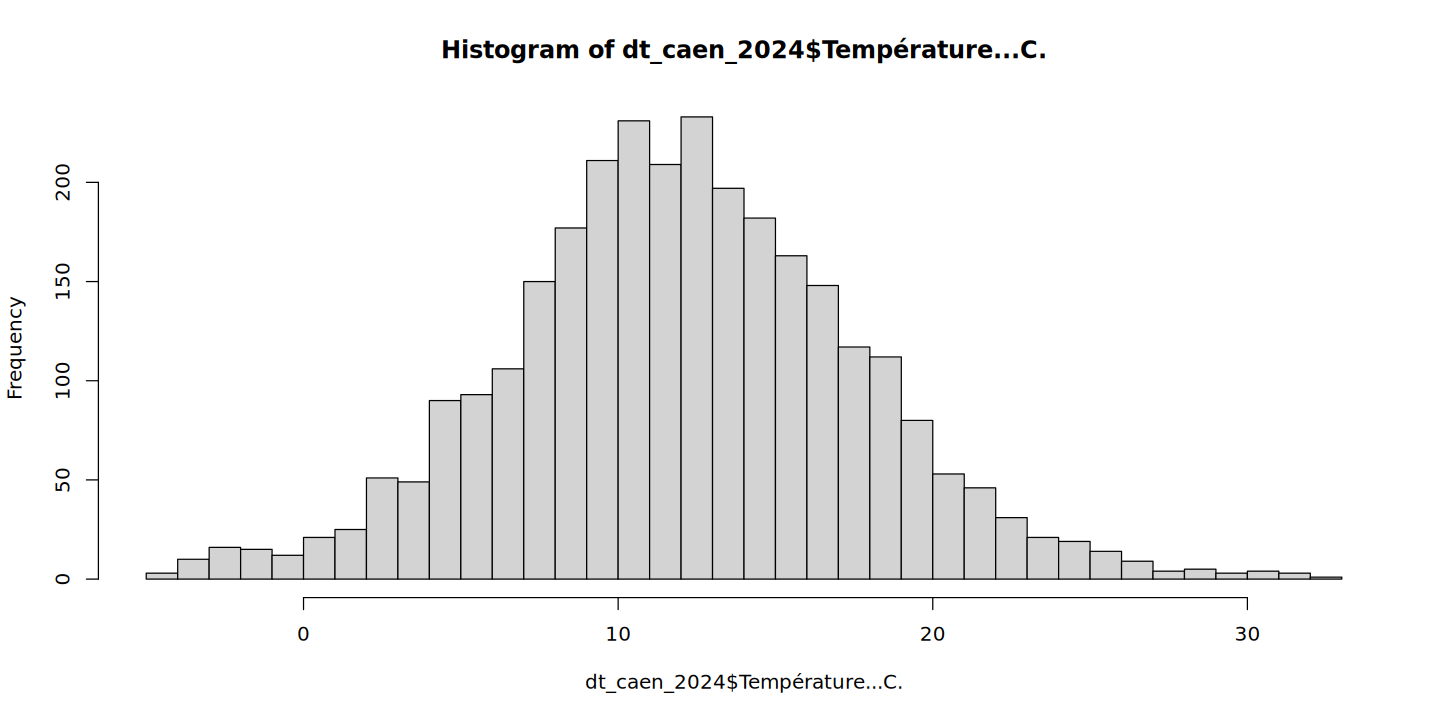

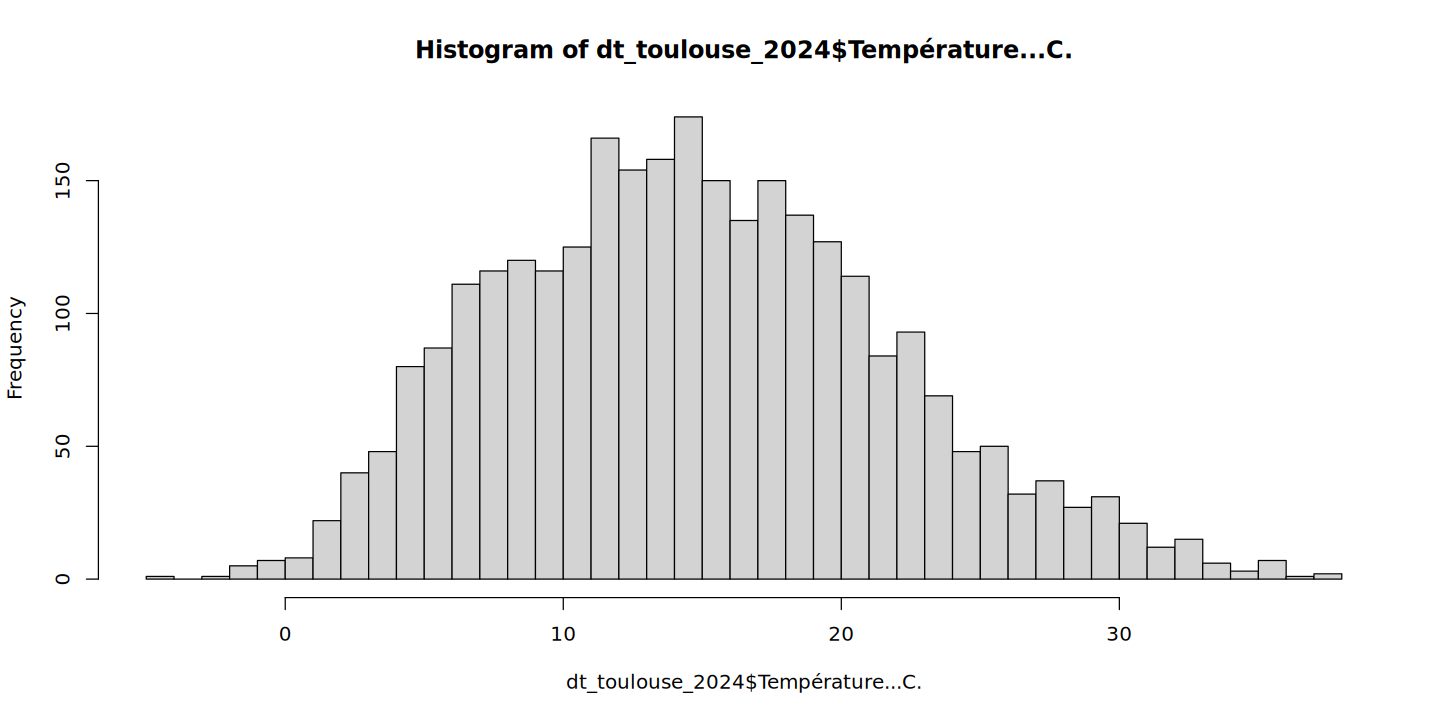

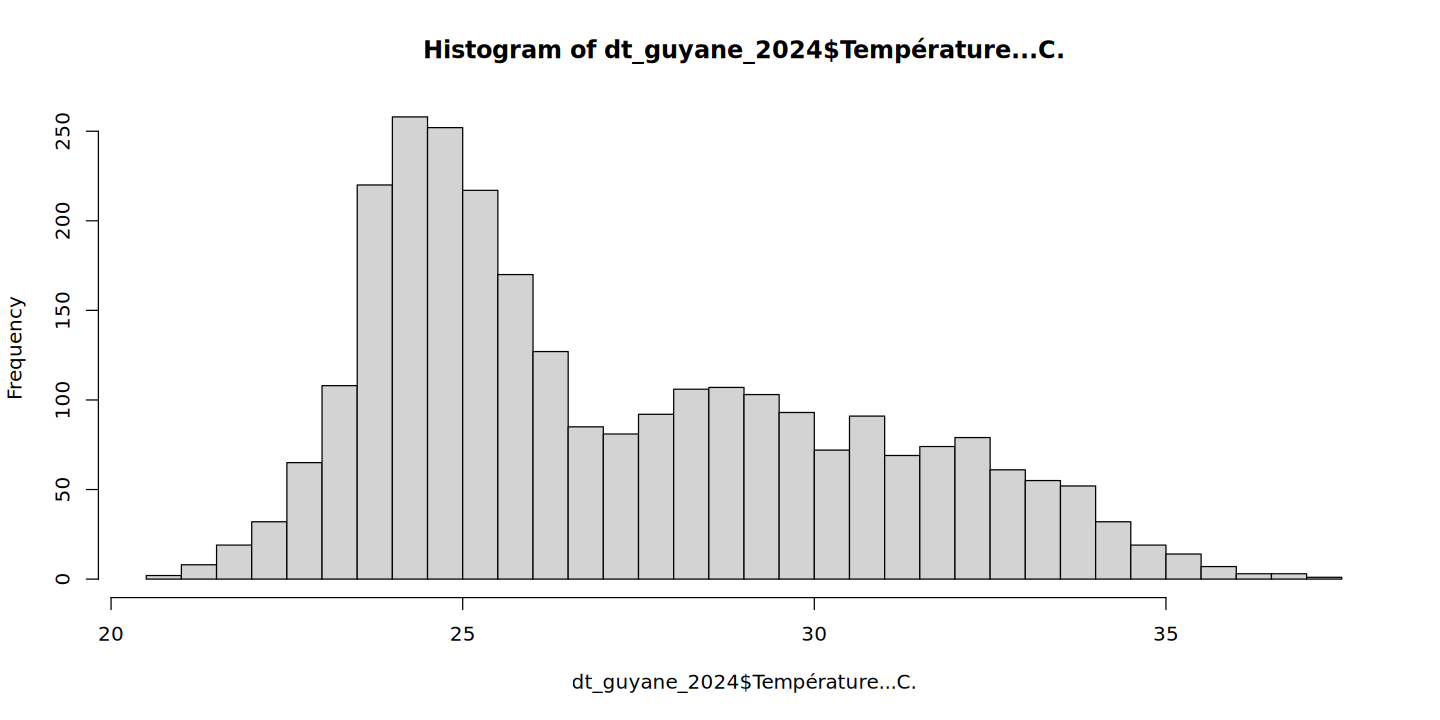

In [35]:
par(bg = "white")
hist(dt_caen_2024$`Température...C.`, breaks = 50)
hist(dt_toulouse_2024$`Température...C.`, breaks = 50)
hist(dt_guyane_2024$`Température...C.`, breaks = 50)

Warning message:
“Removed 5066 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 5066 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


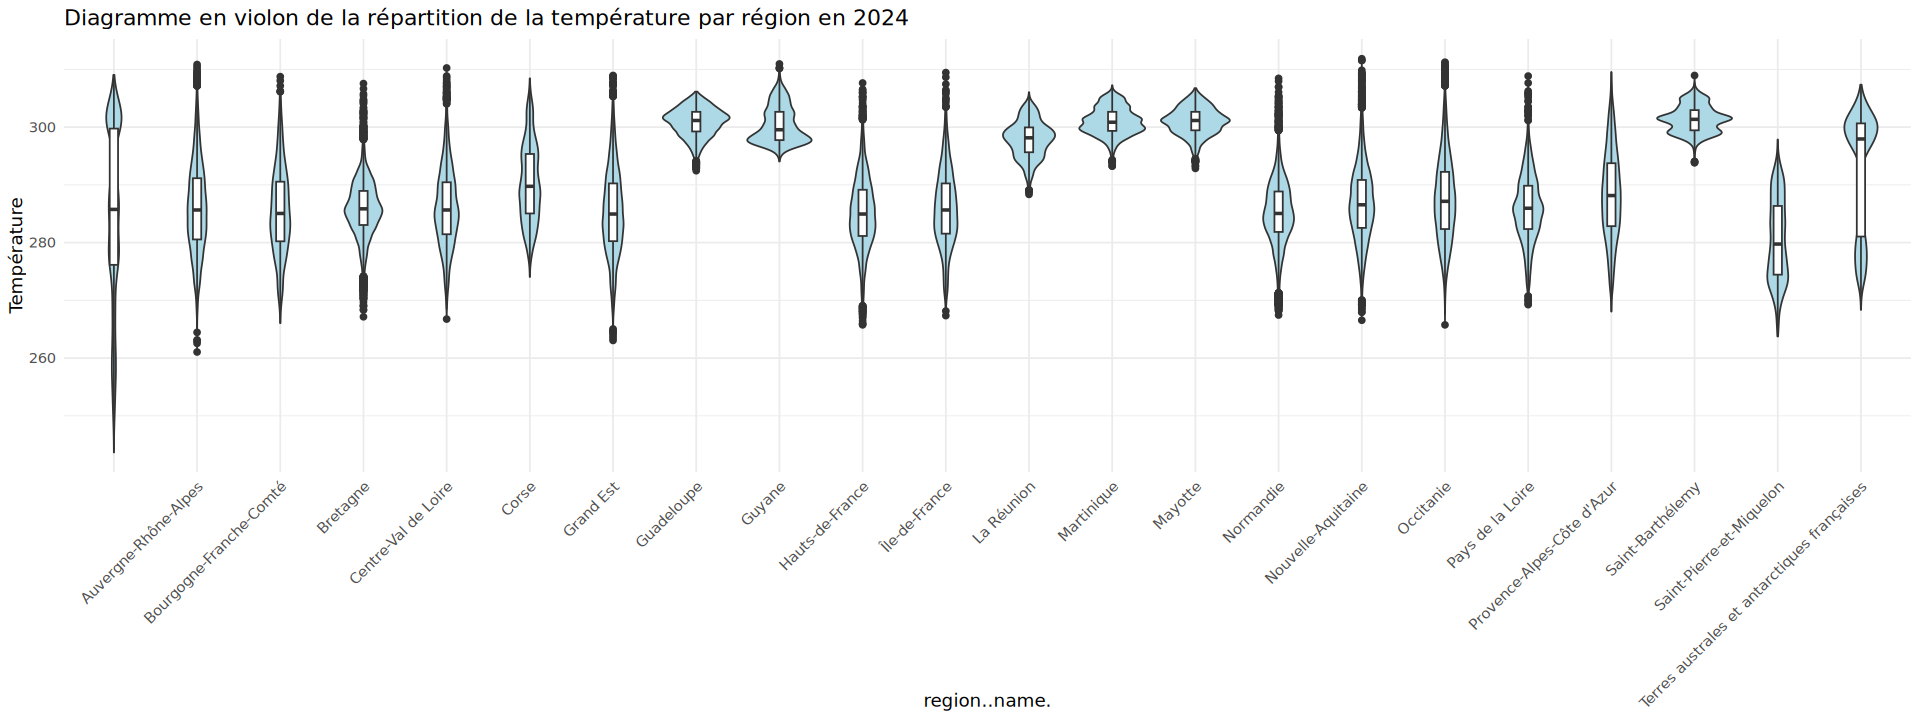

In [40]:
options(repr.plot.width = 16, repr.plot.height = 6)

ggplot(dt_2024, aes(x = region..name., y = `Température`)) +
  geom_violin(trim = TRUE, fill = "lightblue") +
  geom_boxplot(width = 0.1, fill = "white") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Diagramme en violon de la répartition de la température par région en 2024")

Le diagramme en violon ci-dessus traduit également cette observation : les départements d'Outre-Mer représentent un échantillon différent que ceux de France métropolitaine.

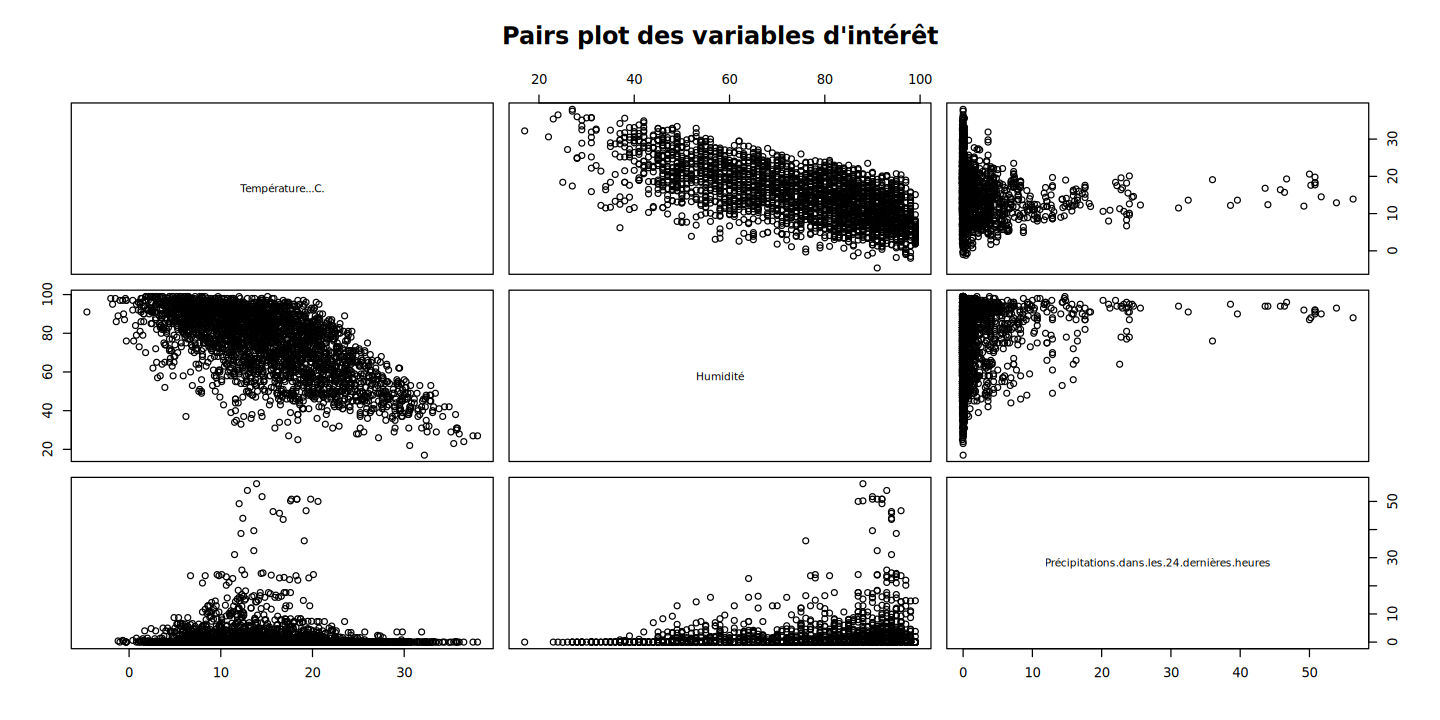

In [33]:
par(bg="white")
pairs(dt_toulouse_2024[, c("Température...C.", "Humidité", "Précipitations.dans.les.24.dernières.heures")],
      main = "Pairs plot des variables d'intérêt")

Lorsque l'on affiche les nuages de points croisés entre la température, l'humidité, et les précipitations sur 24h, on ne semble pas remarquer de corrélation claire pouvant amener à réaliser une régression linéaire. On verra dans la partie dédiée quelles variables l'on peut décider de corréler.

# Partie 2 - Etude d'estimateur

Es ce qu'on fait une hypothèse en mode ca représete la moyenne des température sur les moi suis une loi normale et on fait l'estimateur du max de vraisemblence? 

Estimateur moyenne empirique et variance empirique de la température

In [ ]:
library(boot)


df_subset <- df["Température...C."]
x_temp <- df_subset[df_subset$Température...C. != "", ]
x_temp <- na.omit(x_temp)

n <- length(x_temp)
mean_empirique <- mean(x_temp)

#Calcule sans bias de variacne empirique
var_empirique <- (n/(n-1)) * var(x_temp)

IC_3_min <- mean_empirique - sqrt(var_empirique/(0.05 * n))  
IC_3_max <- mean_empirique + sqrt(var_empirique/(0.05 * n))  

IC_3 <- c(IC_3_min, IC_3_max)

IC_3



[1] 15.37788 15.44186

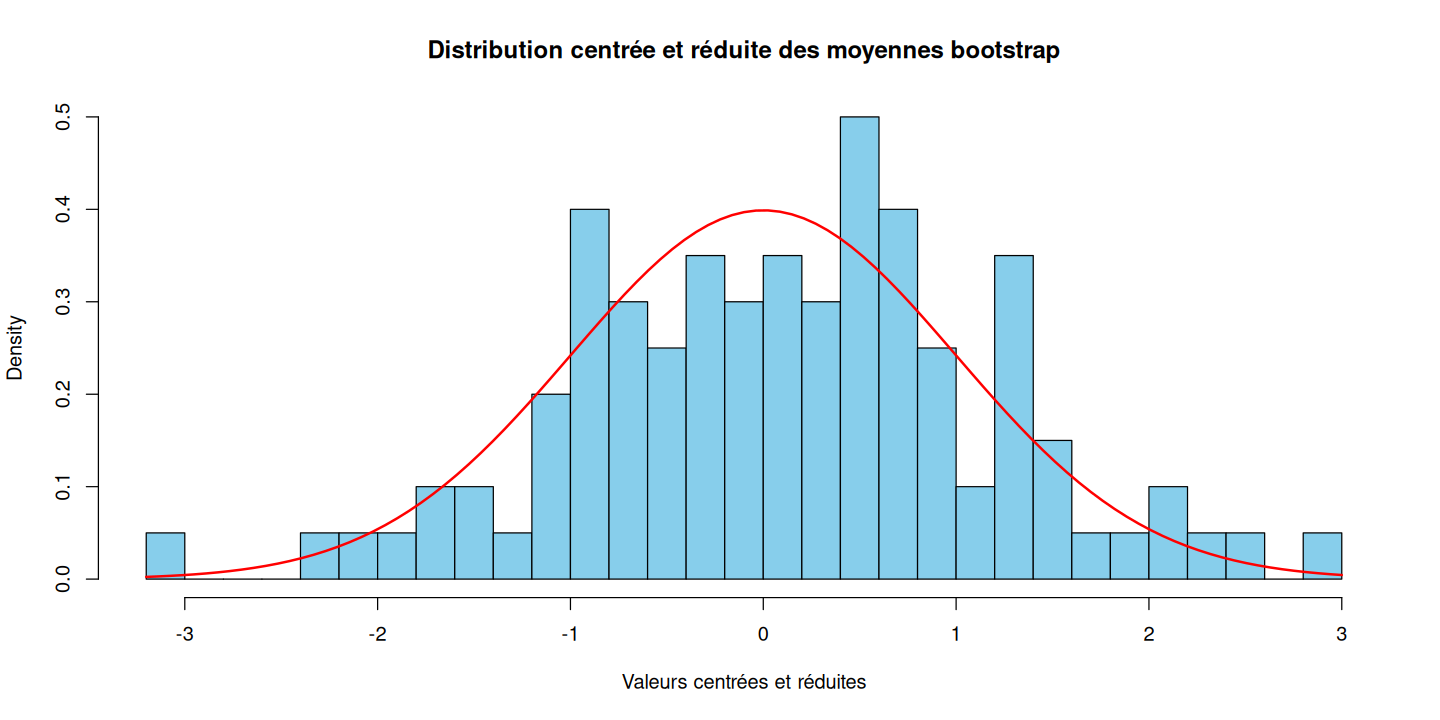

In [ ]:
B <- 100  # nombre de rééchantillonnages
mean_boot <- numeric(B)  # vecteur pour stocker les moyennes bootstrap

set.seed(42)  # pour reproductibilité# Question 2

mean_boot <- replicate(B, {
  X_b <- sample(x_temp, size = n, replace = TRUE)  # échantillon bootstrap
  mean(X_b)                                   # moyenne empirique
})

mean_emp <- mean(x_temp)               # moyenne empirique
std_emp <- sd(x_temp) / sqrt(n)        # écart-type de la moyenne

Z <- (mean_boot - mean_emp) / std_emp  # centrée et réduite

# Histogramme
par(bg= "white")
hist(Z, breaks=30, probability=TRUE, 
     main="Distribution centrée et réduite des moyennes bootstrap",
     xlab="Valeurs centrées et réduites", col="skyblue")

# Ajout d'une courbe normale
curve(dnorm(x, mean=0, sd=1), add=TRUE, col="red", lwd=2)

In [ ]:
df_subset <- df[, c("Date", 'Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol')]
df_subset$Date <- format(as.POSIXct(df$Date, format="%Y-%m-%dT%H:%M:%S", tz="UTC"), "%Y")
df_clean <- na.exclude(df_subset)
df_clean <- df_clean[df_clean$Date != "", ]
df_clean <- df_clean[df_clean$Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol != "", ]

df_neige_annee <- aggregate(Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol ~ Date, data = df_clean, FUN = mean, na.rm = TRUE)
df_neige_annee

Date,Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol
<chr>,<dbl>
2015,0.0002134066
2016,0.0004601610
2017,0.0004578153
2018,0.0004651909
2019,0.0004944241
2020,0.0005345779
2021,0.0004219832
2022,0.0001815977
2023,0.0001785787


In [ ]:
x_neige <- df_neige_annee$Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol
x_neige <- na.omit(x_neige)

n <- length(x_neige)
mean_empirique <- mean(x_neige)

#Calcule sans bias de variacne empirique
var_empirique <- (n/(n-1)) * var(x_neige)

IC_3_min <- mean_empirique - sqrt(var_empirique/(0.05 * n))  
IC_3_max <- mean_empirique + sqrt(var_empirique/(0.05 * n))  

IC_3 <- c(IC_3_min, IC_3_max)

IC_3



[1] 0.0001786713 0.0005527164

In [ ]:
B <- 100  # nombre de rééchantillonnages
mean_boot <- numeric(B)  # vecteur pour stocker les moyennes bootstrap

set.seed(42)  # pour reproductibilité

mean_boot <- replicate(B, {
  X_b <- sample(x_neige, size = n, replace = TRUE)  # échantillon bootstrap
  mean(X_b)                                   # moyenne empirique
})

mean_emp <- mean(x_neige)               # moyenne empirique
std_emp <- sd(x_neige) / sqrt(n)        # écart-type de la moyenne

Z <- (mean_boot - mean_emp) / std_emp  # centrée et réduite

# Histogramme
par(bg= "white")
hist(Z, breaks=30, probability=TRUE, 
     main="Distribution centrée et réduite des moyennes bootstrap",
     xlab="Valeurs centrées et réduites", col="skyblue")

# Ajout d'une courbe normale
curve(dnorm(x, mean=0, sd=1), add=TRUE, col="red", lwd=2)

ERROR: Error in FUN(X[[i]], ...): objet 'x_neige' introuvable


# Partie 3 - Test Statistique

## Test de normalité - Shapiro Wilk

On va chercher à savoir si une des variables que l'on maîtrise possède une distribution se rapprochant d'une loi normale. On va donc procéder à un test de Shapiro-Wilk, sur la distribution de pression en 2024 à Toulouse (cf histogramme ci-dessous), dont la répartition semble se rapprocher d'une normale.

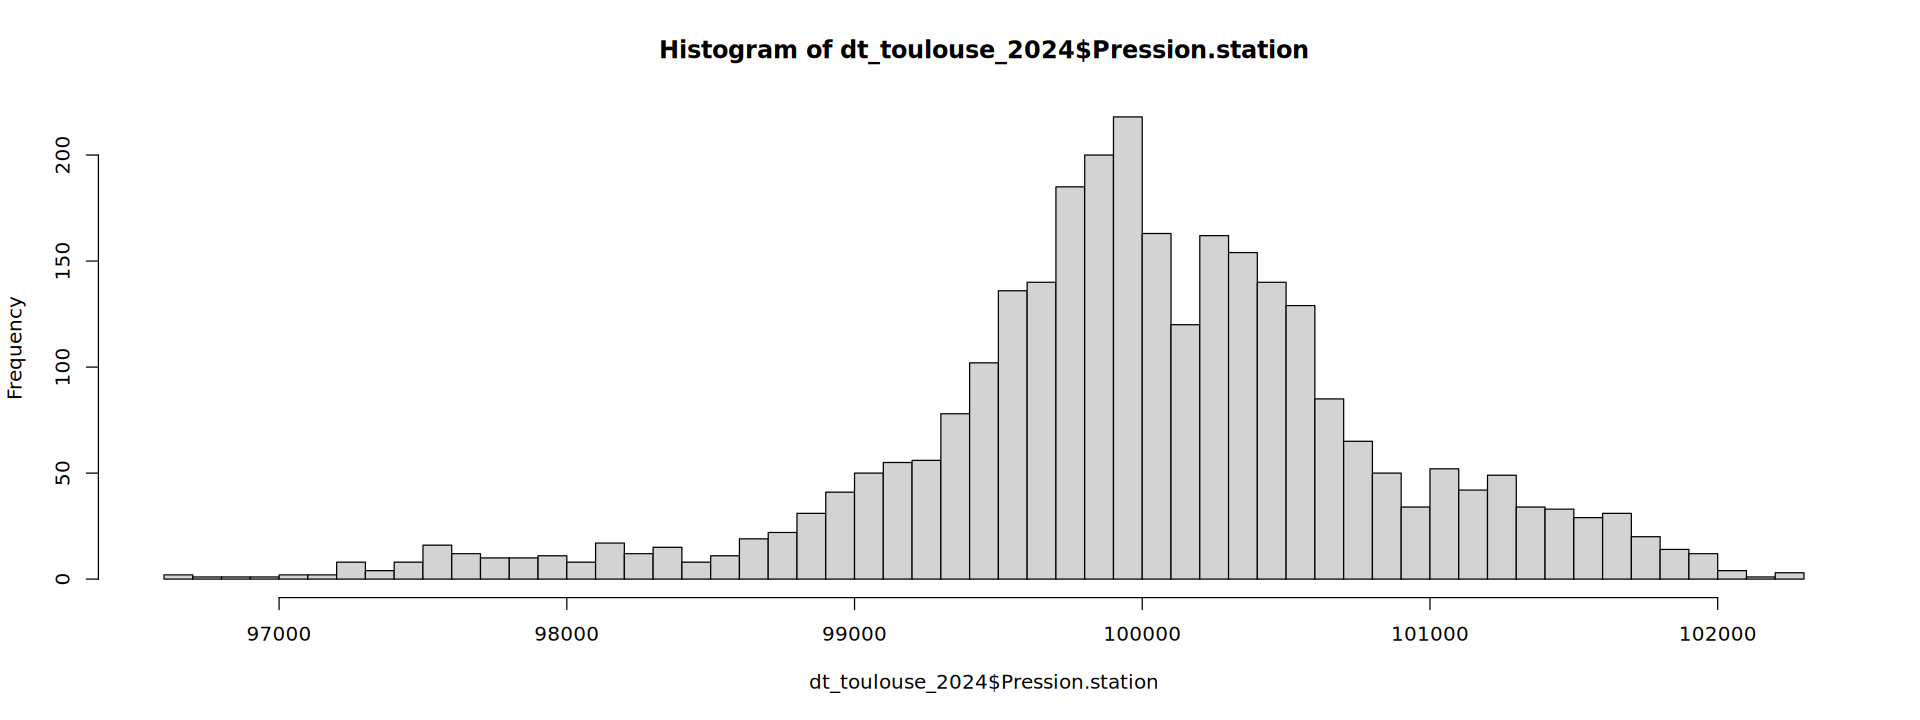

In [69]:
par(bg="white")
hist(dt_toulouse_2024$Pression.station, breaks = 50)

In [70]:
dim(dt_toulouse_2024)
shapiro.test(dt_toulouse_2024$Pression.station)

[1] 2918   82


	Shapiro-Wilk normality test

data:  dt_toulouse_2024$Pression.station
W = 0.9707, p-value < 2.2e-16


Le test nous rend une p-value très proche de 0, l'hypothèse de normalité est donc rejetée ici. Cela peut s'expliquer par le fait que, même si l'on s'est restreint à une ville et une année, le nombre de points reste très important (2918 points), ainsi le moindre écart entre les données et une loi normale fait plonger la p-value. Ainsi, on ne pourra pas estimer à l'aide de ce test que la pression suit une loi normale.

[1] 248  82

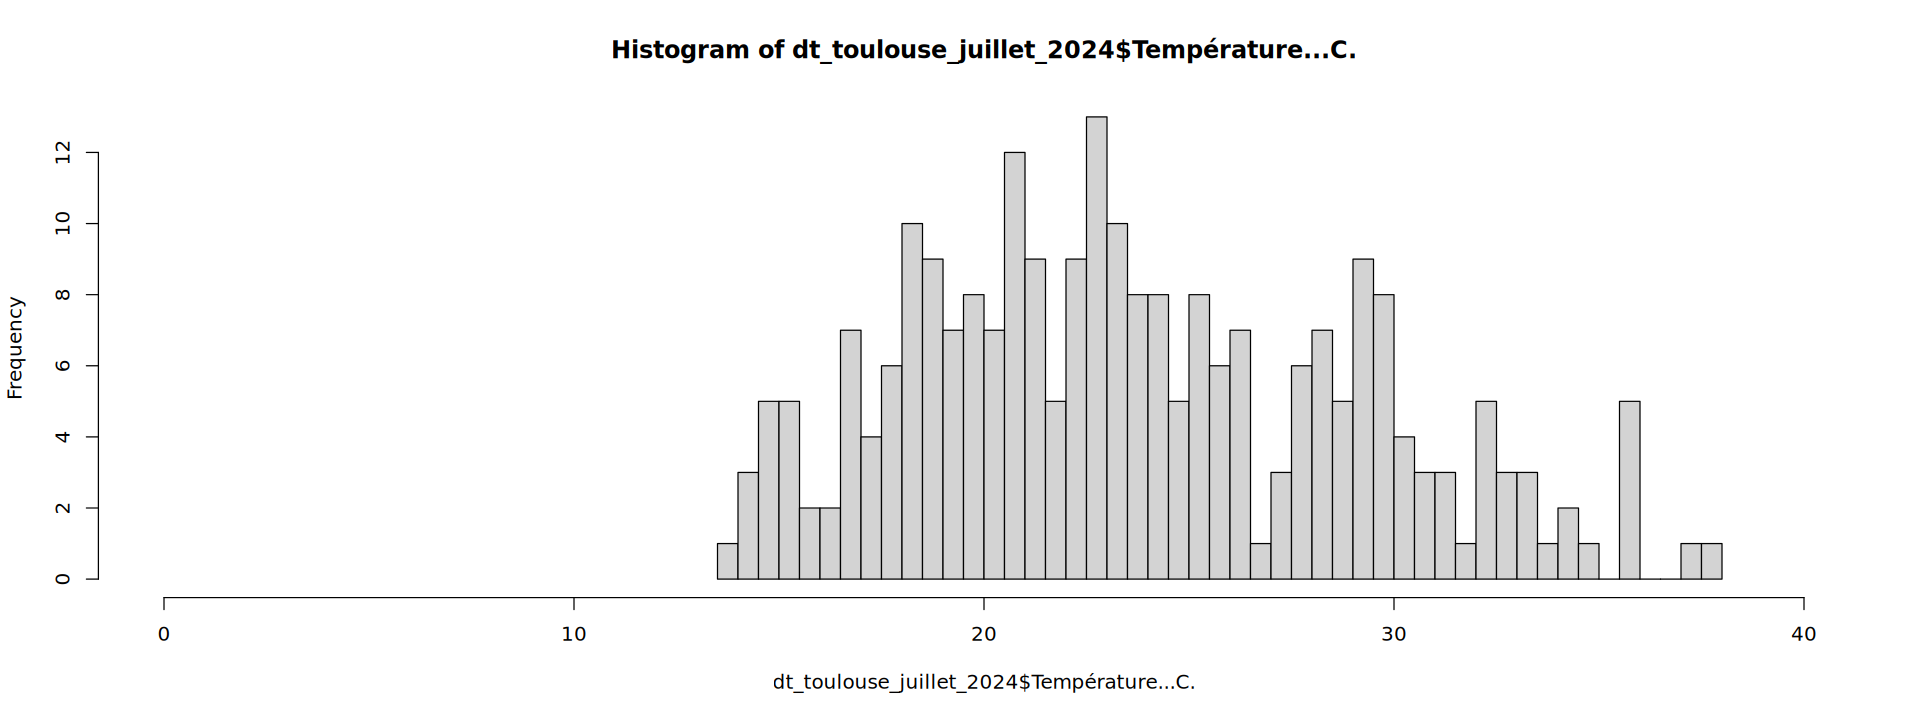

In [74]:
dt_toulouse_juillet_2024 <- dt_toulouse_2024[mois_de_l_annee == '7']
dim(dt_toulouse_juillet_2024)
par(bg = "white")
hist(dt_toulouse_juillet_2024$`Température...C.`, xlim = c(0,40), breaks = 50)

## Test égalité des moyennes mois janvier 2016 et 2025

## ANOVA


In [85]:
dt_occitanie_2024 = dt_2024[dt_2024$region..name. == 'Occitanie']

dim(dt_occitanie_2024)

[1] 20222    82

In [86]:
mod <- aov(Température...C. ~ ID.OMM.station, data = dt_occitanie_2024)
summary(mod)

                  Df Sum Sq Mean Sq F value Pr(>F)    
ID.OMM.station     1  37726   37726   776.2 <2e-16 ***
Residuals      20127 978209      49                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
93 observations deleted due to missingness

# Partie 4

## Etude de correl
Matrice de correlation pour mettre en lumière les trcs à tester

## Regression Température = f (Année)

## Regression vitesse et direction du vent

Tarbes pour les montagnes

Toulouse pour le vent d'autan

## Regression Multiple :
On met la totalité du dataset à Toulouse pour regarder la prediction de temperature
On fait des kfold pour entrainer et des lasso pour regarder en combien de paramètres on peut prédire la meteo

In [ ]:
colnames(df)

[1] "ID.OMM.station"                                           
 [2] "Date"                                                     
 [3] "Pression.au.niveau.mer"                                   
 [4] "Variation.de.pression.en.3.heures"                        
 [5] "Type.de.tendance.barométrique"                            
 [6] "Direction.du.vent.moyen.10.mn"                            
 [7] "Vitesse.du.vent.moyen.10.mn"                              
 [8] "Température"                                              
 [9] "Point.de.rosée"                                           
[10] "Humidité"                                                 
[11] "Visibilité.horizontale"                                   
[12] "Temps.présent"                                            
[13] "Temps.passé.1"                                            
[14] "Temps.passé.2"                                            
[15] "Nebulosité.totale"                                        
[16] "Nébulosité..des.nuages.de.l..étage.inférieur"             
[17] "Hauteur.de.la.base.des.nuages.de.l.étage.inférieur"       
[18] "Type.des.nuages.de.l.étage.inférieur"                     
[19] "Type.des.nuages.de.l.étage.moyen"                         
[20] "Type.des.nuages.de.l.étage.supérieur"                     
[21] "Pression.station"                                         
[22] "Niveau.barométrique"                                      
[23] "Géopotentiel"                                             
[24] "Variation.de.pression.en.24.heures"                       
[25] "Température.minimale.sur.12.heures"                       
[26] "Température.minimale.sur.24.heures"                       
[27] "Température.maximale.sur.12.heures"                       
[28] "Température.maximale.sur.24.heures"                       
[29] "Température.minimale.du.sol.sur.12.heures"                
[30] "Méthode.de.mesure.Température.du.thermomètre.mouillé"     
[31] "Température.du.thermomètre.mouillé"                       
[32] "Rafale.sur.les.10.dernières.minutes"                      
[33] "Rafales.sur.une.période"                                  
[34] "Periode.de.mesure.de.la.rafale"                           
[35] "Etat.du.sol"                                              
[36] "Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol"
[37] "Hauteur.de.la.neige.fraîche"                              
[38] "Periode.de.mesure.de.la.neige.fraiche"                    
[39] "Précipitations.dans.la.dernière.heure"                    
[40] "Précipitations.dans.les.3.dernières.heures"               
[41] "Précipitations.dans.les.6.dernières.heures"               
[42] "Précipitations.dans.les.12.dernières.heures"              
[43] "Précipitations.dans.les.24.dernières.heures"              
[44] "Phénomène.spécial.1"                                      
[45] "Phénomène.spécial.2"                                      
[46] "Phénomène.spécial.3"                                      
[47] "Phénomène.spécial.4"                                      
[48] "Nébulosité.couche.nuageuse.1"                             
[49] "Type.nuage.1"                                             
[50] "Hauteur.de.base.1"                                        
[51] "Nébulosité.couche.nuageuse.2"                             
[52] "Type.nuage.2"                                             
[53] "Hauteur.de.base.2"                                        
[54] "Nébulosité.couche.nuageuse.3"                             
[55] "Type.nuage.3"                                             
[56] "Hauteur.de.base.3"                                        
[57] "Nébulosité.couche.nuageuse.4"                             
[58] "Type.nuage.4"                                             
[59] "Hauteur.de.base.4"                                        
[60] "Coordonnees"                                              
[61] "Nom"                                                      
[62] "Type.de.tendance.barométrique.

# ACP et PLS

## ACP study

Les tags c'est les villes
On prend 5 ou 6 paramètres MOYENNÉS SUR UN AN: vit vent, humidité, pression, temperature, precipitation moyenne


Note pour l'auteur : tu forces la création d'un plan pour regarder tes variables, et ca te génères 2 grandes directions principales pour avoir un nouvel oeil sur nos data et avoir une nouvelle overview

## PLS - to be continued


# Clustering

## Déterminer les différents climats en france

On va chercher à créer différents groupes relatifs aux climats similaires en France. On va, pour cela, se baser sur les températures moyennes mensuelles dans chaque station, ainsi que sur les taux d'humidités moyens mensuels dans chaque station. On va utiliser la méthode KMeans pour créer 6 groupes que l'on espère similaires.

In [102]:
df_moy <- df %>%
  group_by(communes..name., mois_de_l_annee) %>%
  summarise(Temp_moy = mean(`Température...C.`, na.rm = TRUE),
    Hum_moy  = mean(Humidité, na.rm = TRUE),
    .groups = "drop")

df_clustering <- df_moy %>%
  pivot_wider(
    names_from = mois_de_l_annee,
    values_from = c(Temp_moy, Hum_moy),
    names_sep = "_"
  )

df_clustering <- as.data.frame(df_clustering) 
rownames(df_clustering) <- df_clustering$communes..name.
df_clustering$communes..name. <- NULL

df_clustering <- scale(df_clustering)

head(df_clustering)

,Temp_moy_1,Temp_moy_2,Temp_moy_3,Temp_moy_4,Temp_moy_5,Temp_moy_6,Temp_moy_7,Temp_moy_8,Temp_moy_9,Temp_moy_10,⋯,Hum_moy_3,Hum_moy_4,Hum_moy_5,Hum_moy_6,Hum_moy_7,Hum_moy_8,Hum_moy_9,Hum_moy_10,Hum_moy_11,Hum_moy_12
,0.36009730,0.2100759,-0.03573204,-0.42975043,-1.12535696,-2.2976554,-2.7550417,-2.7910753,-2.0448317,-1.0561149,⋯,0.17442405,0.37917555,-0.07853593,-0.01213451,0.5607967,0.4603228,0.07256200,-1.3539650,-1.3583969,-1.3414083
Abbeville,-0.62302184,-0.6286175,-0.64379703,-0.66246544,-0.68296757,-0.7501947,-0.7241734,-0.7215738,-0.6708515,-0.6540819,⋯,0.67372461,0.13371328,0.39389551,0.58552017,0.4763068,0.6804780,0.98638673,1.1379544,0.9162609,0.8307496
Ajaccio,-0.05435271,-0.1133435,-0.13105269,-0.09533259,0.08343007,0.4723503,0.7246634,0.6706851,0.4590244,0.2498825,⋯,-0.24398746,0.08245481,-0.15564532,-0.52398947,-0.3986091,-0.4567034,-0.65535620,-1.1260678,-0.7336444,-0.5804630
Archipel des Kerguelen,-0.22294955,-0.3215295,-0.67168020,-1.22740585,-2.28167185,-3.6381049,-4.2965343,-4.2240566,-3.2178205,-2.0777020,⋯,0.03693977,0.75310281,0.68816983,0.85031910,0.9016590,0.7722695,0.09628465,-1.1887106,-1.5405071,-1.7879378
Athis-Mons,-0.60187802,-0.5922956,-0.52272250,-0.45652279,-0.34799586,-0.1628513,-0.0878796,-0.2006901,-0.4056405,-0.5546182,⋯,-0.39865188,-0.99504806,-0.94835411,-0.87149899,-1.0148529,-0.7213998,-0.31806891,0.5625935,0.7598521,0.7219608
Bangor,-0.18433283,-0.2769188,-0.37439813,-0.42613447,-0.46282190,-0.5704868,-0.6180931,-0.6413808,-0.3866883,-0.2726897,⋯,0.65536558,0.50417925,0.46758922,0.62756178,0.7336919,0.8593666,0.79831840,0.6637750,-0.1411113,0.1909474


In [107]:
dim(df_clustering)

[1] 57 24

In [109]:
distances = dist(df_clustering)
cah = hclust(df_clustering, method = "complete")
groupes = cutree(cah_ward, k = 6)


ERROR: Error in if (is.na(n) || n > 65536L) stop("size cannot be NA nor exceed 65536"): missing value where TRUE/FALSE needed


In [103]:
kmeans <- kmeans(df_clustering, centers=6)
cat("Groupes des individus pour la méthode K-means :\n")
print(kmeans$cluster)

Groupes des individus pour la méthode K-means :


                                                  Abbeville 
                            4                             1 
                      Ajaccio        Archipel des Kerguelen 
                            2                             4 
                   Athis-Mons                        Bangor 
                            3                             1 
       Barberey-Saint-Sulpice                       Blagnac 
                            3                             3 
                    Blotzheim                          Boos 
                            3                             1 
                      Bourges                     Carpiquet 
                            3                             1 
                       Cerisé                     Chaspuzac 
                            3                             3 
             Clermont-Ferrand            Colombier-Saugnieu 
                            2                             2 
                       E

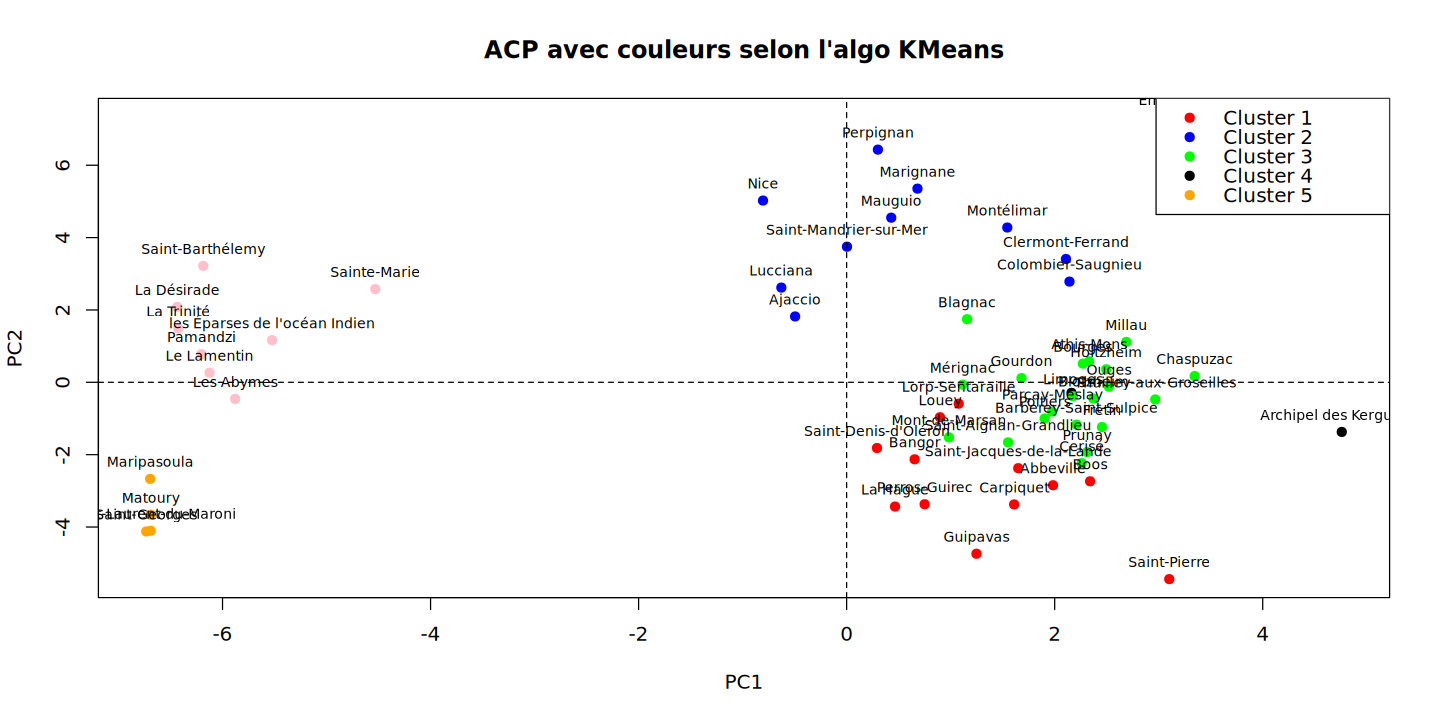

In [110]:
acp_clustering <- prcomp(df_clustering)
colors <- c("red", "blue", "green", "black", "orange", "pink")
point_colors <- colors[kmeans$cluster]
par(bg = "white")
plot(acp_clustering$x[,1], acp_clustering$x[,2], 
     col = point_colors, 
     pch = 19,
     xlab="PC1", ylab="PC2",
     main="ACP avec couleurs selon l'algo KMeans")

text(acp_clustering$x[,1], acp_clustering$x[,2], 
     labels = rownames(df_clustering), 
     pos = 3,
     cex = 0.7)
     
legend("topright", legend = paste("Cluster", 1:5), col=colors, pch=19)
abline(v = 0, lty = 2, col = "black")
abline(h = 0, lty = 2, col = "black")